In [1]:
import pandas as pd
print("pandas: " + pd.__version__)
import numpy as np
print("numpy:" + np.__version__)
import matplotlib.pyplot as plt
print("matplotlib: " + np.__version__)
import seaborn as sns
print("seaborn: " + sns.__version__)

pandas: 2.3.3
numpy:2.3.3
matplotlib: 2.3.3
seaborn: 0.13.2


In [8]:
# Pfad zum Datensatz - mit Filter für unrealistische Werte 
data_path = "/home/daniel/Dokumente/cardio_train.csv"
df = pd.read_csv(data_path, sep=";")
print("data is loaded")

data is loaded


In [9]:
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [27]:
import pandas as pd

# 1. Daten laden
data_path = "/home/daniel/Dokumente/cardio_train.csv"
df = pd.read_csv(data_path, sep=";")
print("Daten wurden geladen. Ursprüngliche Anzahl Einträge:", len(df))

# 2. Filter für realistische Werte (Frauen & Männer)
# Annahmen:
# - Größe: 140–220 cm (Erwachsene)
# - Gewicht: 30–200 kg (Erwachsene)
df_filtered = df[
    (df['height'] >= 140) & (df['height'] <= 220) &  # Größe in cm
    (df['weight'] >= 30) & (df['weight'] <= 200)     # Gewicht in kg
]

# 3. Ergebnis ausgeben
print(f"Gefilterte Daten: {len(df_filtered)} Einträge (vorher: {len(df)})")
print(f"Entfernte Einträge: {len(df) - len(df_filtered)} ({(len(df) - len(df_filtered)) / len(df) * 100:.2f}%)")

# 4. Optional: Gefilterte Daten in neue CSV speichern
# df_filtered.to_csv("cardio_train_filtered.csv", index=False, sep=";")


Daten wurden geladen. Ursprüngliche Anzahl Einträge: 70000
Gefilterte Daten: 69841 Einträge (vorher: 70000)
Entfernte Einträge: 159 (0.23%)


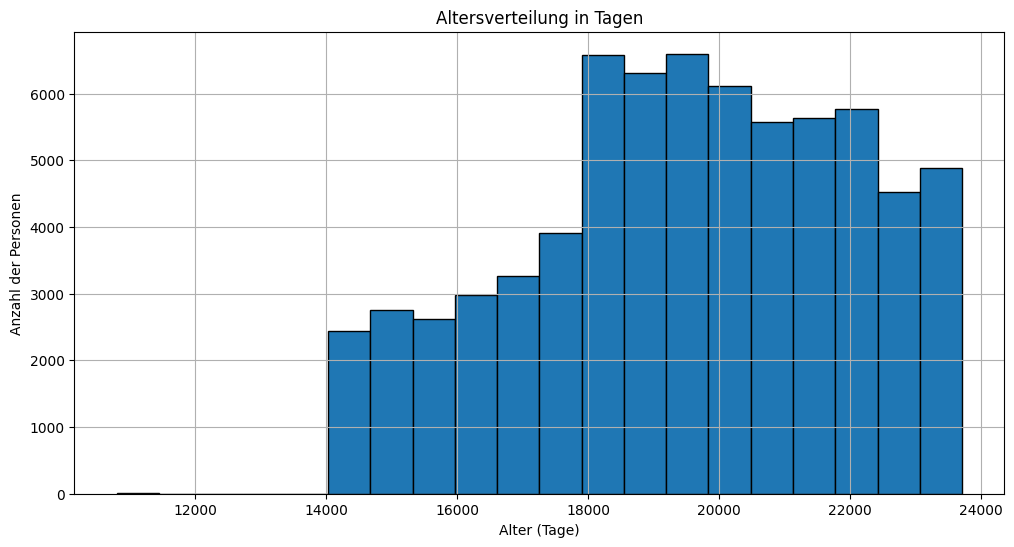

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Altersverteilung in Tagen')
plt.xlabel('Alter (Tage)')
plt.ylabel('Anzahl der Personen')
plt.grid(True)
plt.show()

**Wie sehr spielt Drogenabhängigkeit eine Rolle?**
- 3 Eingangsvariablen, nachdem ob jemand rauch, ob jemand Alkoholiker ist und ob die Person erkrankt ist

Zu sehen ist :
"Rauchen könnte schädlicher sein als Alkohol"
- mehr Personen sind erkrankt wenn sie nur rauchen
- weniger Personen sind erkrankt wenn sie nur Alkoholiker sind


# anahnd dessen weitere Analyse mit Alter als weitere Faktor bei Rauchen 

In [20]:
grouped_data = df.groupby(['smoke', 'alco', 'cardio']).size().reset_index(name='counts')
print(grouped_data)

   smoke  alco  cardio  counts
0      0     0       0   30870
1      0     0       1   31051
2      0     1       0     911
3      0     1       1     999
4      1     0       0    2210
5      1     0       1    2105
6      1     1       0    1030
7      1     1       1     824


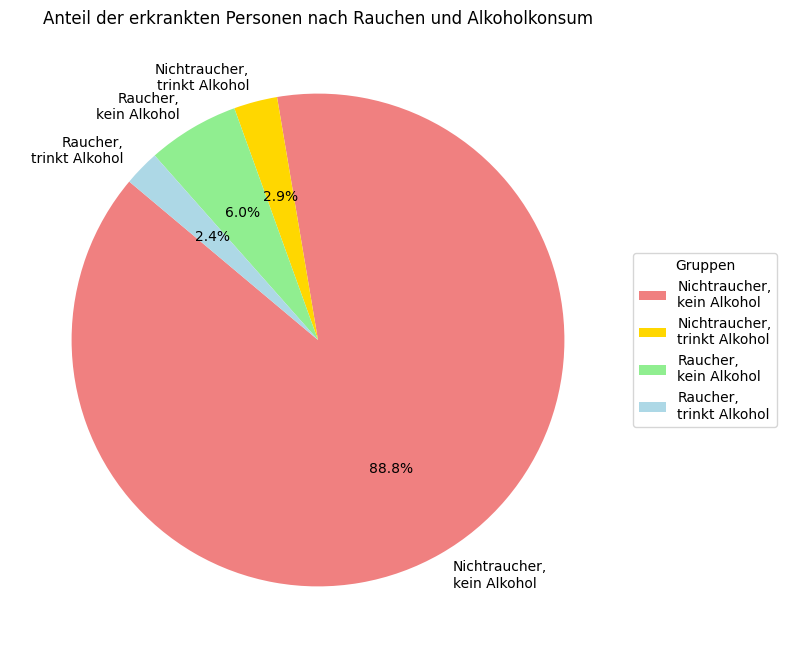

In [12]:
df_filtered = df[df['cardio'] == 1] # nur die bereits erkrankten 

# Gruppieren der Daten nach Rauchen und Alkoholkonsum
grouped_data = df_filtered.groupby(['smoke', 'alco']).size()

# Umbenennen der Index-Werte für bessere Lesbarkeit im Kreisdiagramm
grouped_data.index = grouped_data.index.map({
    (0, 0): 'Nichtraucher,\nkein Alkohol',
    (0, 1): 'Nichtraucher,\ntrinkt Alkohol',
    (1, 0): 'Raucher,\nkein Alkohol',
    (1, 1): 'Raucher,\ntrinkt Alkohol'
})

# Kreisdiagramm erstellen
plt.figure(figsize=(10, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'lightgreen', 'lightblue'])
plt.title('Anteil der erkrankten Personen nach Rauchen und Alkoholkonsum')

# Legende hinzufügen
plt.legend(grouped_data.index, title="Gruppen", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

<Figure size 1000x600 with 0 Axes>

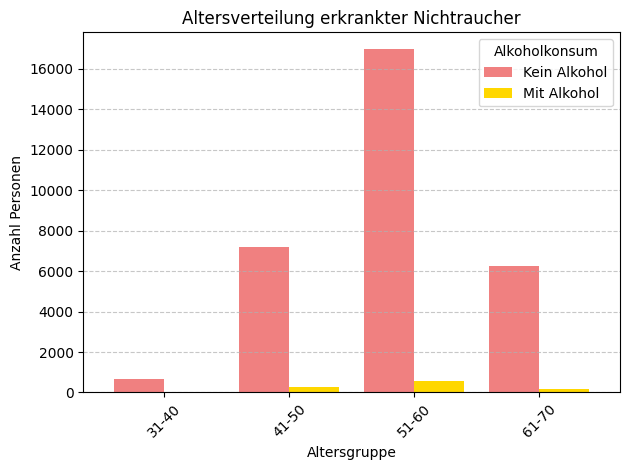

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten filtern und kopieren
df_nonsmokers = df[(df['cardio'] == 1) & (df['smoke'] == 0)].copy()

# Alter in Jahre umrechnen
df_nonsmokers.loc[:, 'age_years'] = df_nonsmokers['age'] // 365

# Altersgruppen definieren
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_nonsmokers.loc[:, 'age_group'] = pd.cut(df_nonsmokers['age_years'], bins=bins, labels=labels)

# Gruppieren mit expliziter observed-Einstellung
age_alco_nonsmokers = df_nonsmokers.groupby(['age_group', 'alco'], observed=True).size().unstack()

# Plot (unverändert)
plt.figure(figsize=(10, 6))
age_alco_nonsmokers.plot(kind='bar', color=['lightcoral', 'gold'], width=0.8)
plt.title('Altersverteilung erkrankter Nichtraucher')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl Personen')
plt.xticks(rotation=45)
plt.legend(title='Alkoholkonsum', labels=['Kein Alkohol', 'Mit Alkohol'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Gesamtzahl erkrankter Nichtraucher:
Die ≈31.000 erkrankten Personen (aus dem ursprünglichen Dataset) minus die Raucher (die im anderen Diagramm dargestellt sind).

Hauptrisikogruppe: 51-60 Jahre (≈17.000 Erkrankte), aber nur ≈500 (2.9%) davon konsumieren Alkohol.
Alkoholanteil insgesamt: Selbst in der größten Gruppe ist der Anteil an Alkoholkonsumenten unter 5% – statistisch kein dominanter Faktor.
Altersabhängigkeit: Der Alkoholkonsum ist in jüngeren Gruppen (31-40) prozentual höher (5%), aber absolut gesehen irrelevant (nur 50 Personen).

**Alter ist der dominierende Faktor**   
Exponentieller Anstieg: Die Erkrankungszahlen steigen mit dem Alter stark an (1.000 bei 31-40 vs. 17.000 bei 51-60).  
Biologische Plausibilität: Herz-Kreislauf-Erkrankungen sind alterskorreliert (z. B. durch Arteriosklerose, Bluthochdruck).
___________________

<Figure size 1000x600 with 0 Axes>

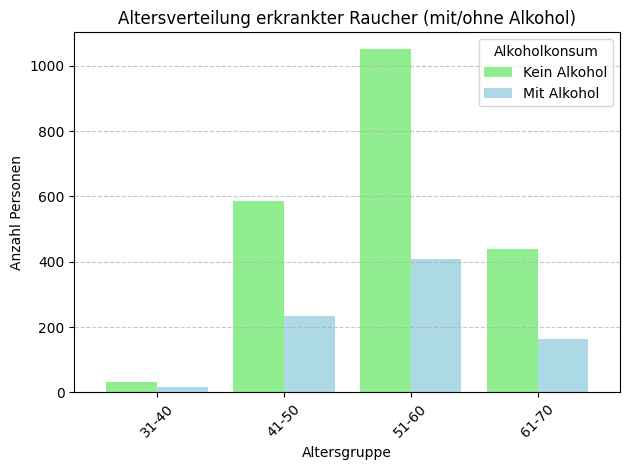

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Daten filtern und explizit kopieren (vermeidet SettingWithCopyWarning)
df_smokers = df[(df['cardio'] == 1) & (df['smoke'] == 1)].copy()

# 2. Alter in Jahre umrechnen (mit .loc)
df_smokers.loc[:, 'age_years'] = (df_smokers['age'] // 365).astype(int)

# 3. Altersgruppen definieren und zuweisen (mit .loc)
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_smokers.loc[:, 'age_group'] = pd.cut(
    df_smokers['age_years'],
    bins=bins,
    labels=labels,
    right=False  # Alter 60 fällt in 51-60 (nicht 61-70)
)

# 4. Gruppieren mit expliziter observed-Einstellung (vermeidet FutureWarning)
age_alco_smokers = df_smokers.groupby(
    ['age_group', 'alco'],
    observed=True  # oder False, je nach gewünschtem Verhalten
).size().unstack()

# 5. Plot (unverändert)
plt.figure(figsize=(10, 6))
age_alco_smokers.plot(
    kind='bar',
    color=['lightgreen', 'lightblue'],
    width=0.8
)
plt.title('Altersverteilung erkrankter Raucher (mit/ohne Alkohol)')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl Personen')
plt.xticks(rotation=45)
plt.legend(title='Alkoholkonsum', labels=['Kein Alkohol', 'Mit Alkohol'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Grundgesamtheit der erkrankten Raucher

Gesamtzahl: ≈ 2.100 erkrankte Raucher (Summe aller Balken).
Hauptrisikogruppe: 51–60 Jahre (≈ 1.000 Personen, davon:
≈ 600 ohne Alkohol (grün)
≈ 400 mit Alkohol (blau)
)


Altersabhängiger Rückgang:
61–70 Jahre: Nur noch ≈ 450 Personen (davon ≈ 300 ohne Alkohol, ≈ 150 mit Alkohol).
Deutung: Selektionsbias durch Sterblichkeit – Ältere Raucher mit CVD sterben möglicherweise früher und sind daher in höheren Altersgruppen unterrepräsentiert.  

**Alkoholanteil steigt mit dem Alter (bis 51–60):**

In der Hauptrisikogruppe (51–60) haben 40% der erkrankten Raucher auch Alkoholkonsum (vs. nur 28.6% bei 31–40).
Interpretation: Alkohol könnte kumulativ wirken – langjähriger Konsum erhöht das CVD-Risiko in Kombination mit Rauchen.


In [21]:
# Anzahl der Personen mit Gewicht < 30 kg
underweight_count = (df['weight'] < 30).sum()

# Ausgabe
print(f"Gesamtzahl der Personen mit Gewicht unter 30 kg: {underweight_count}")


Gesamtzahl der Personen mit Gewicht unter 30 kg: 7


In [22]:
# Anzahl der Personen mit Gewicht < 30 kg
underweight_count = (df['weight'] < 40).sum()

# Ausgabe
print(f"Gesamtzahl der Personen mit Gewicht unter 40 kg: {underweight_count}")


Gesamtzahl der Personen mit Gewicht unter 30 kg: 52


In [23]:
# Anzahl der Personen mit Größe < 140 cm
unrealistic_height_count = (df['height'] < 140).sum()

# Ausgabe
print(f"Gesamtzahl der Personen mit unrealistischer Größe (unter 140 cm): {unrealistic_height_count}")


Gesamtzahl der Personen mit unrealistischer Größe (unter 140 cm): 152


In [24]:
# Anzahl der Personen mit Größe < 140 cm
unrealistic_height_count = (df['height'] < 120).sum()

# Ausgabe
print(f"Gesamtzahl der Personen mit unrealistischer Größe (unter 140 cm): {unrealistic_height_count}")


Gesamtzahl der Personen mit unrealistischer Größe (unter 140 cm): 52


__________________
Medizinische Untergrenze (ohne Wachstumsstörungen):
~145–150 cm

Begründung:
Unter 145 cm bei Erwachsenen sind hormonelle Störungen (z. B. Wachstumshormonmangel), genetische Syndrome (z. B. Turner-Syndrom) oder schwere Mangelernährung wahrscheinlich.
150 cm gilt als untere Grenze des Normalbereichs für gesunde Erwachsene (z. B. nach WHO-Standards für Körpergrößenverteilung).

**als Untergrenze wprde ich gerne 140 cm behandeln**